In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import librosa.display

In [2]:
file_path = 'datasets/genres/blues/blues.00005.wav'

In [3]:
ipd.Audio(file_path)

### Waveform

In [4]:
wav, sr = librosa.core.load(file_path)

# wav : numpy array 형태
# sample rate : default는 22050
# sr * T = len(wav)

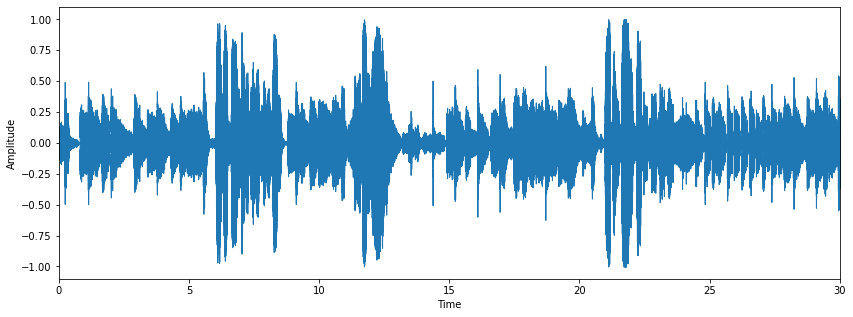

In [5]:
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(wav, sr=sr)
plt.ylabel("Amplitude")
plt.show()

## FFT

In [6]:
## FFT를 구하고
## complex value(복소수)는 버리고 magnitude를 구함.
## np.linspace 를 통해 구간을 정함

fft = np.fft.fft(wav) 

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

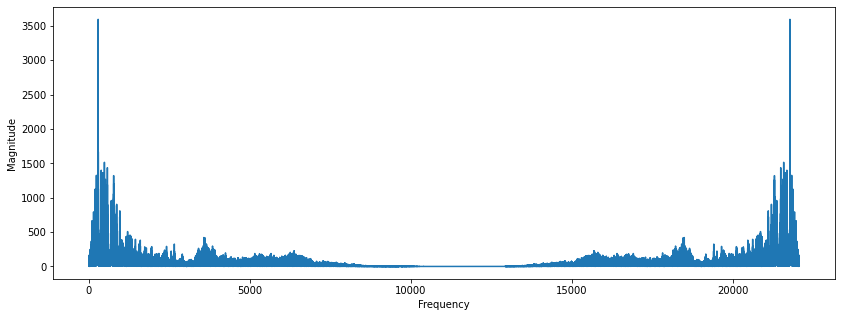

In [7]:
fig = plt.figure(figsize = (14,5))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

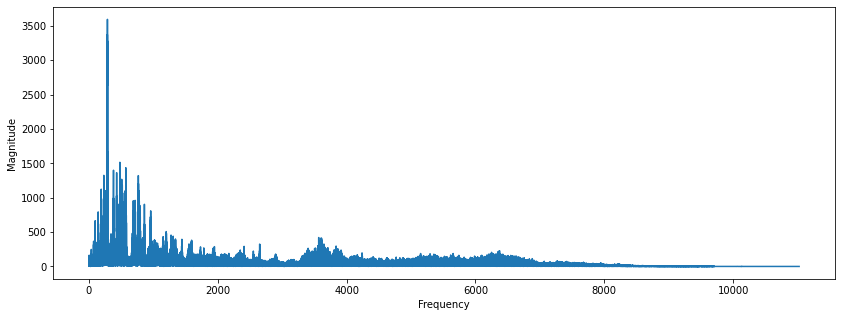

In [8]:
# power spectrum

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize = (14,5))
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

## STFT (Short-Time Fourier Transform)

In [11]:
n_fft = 2048 ## Window를 얼마나 많은 주파수 밴드로 나누는가 입니다.
hop_length = 512 ## 윈도우가 겹치는 사이즈입니다. 일반적으로는 1/4정도를 겹치도록 설정함.

stft = librosa.core.stft(wav, 
                         n_fft = n_fft, 
                         hop_length = hop_length)

spectrogram = np.abs(stft)

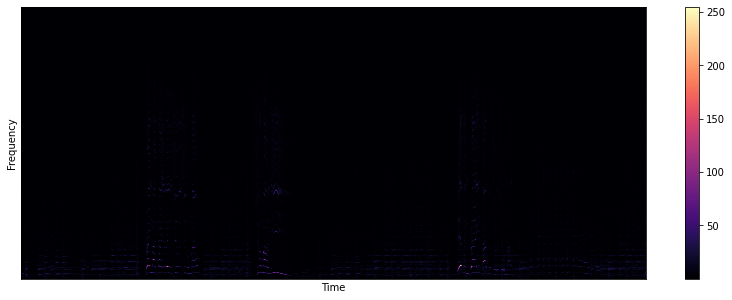

In [12]:
fig = plt.figure(figsize = (14,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

## 하단에 위치하는 것을 볼 수는 있으나, 너무 미세하기 때문에 관찰이 어려움.
## 따라서 로그 변환을 취해주어야 함.

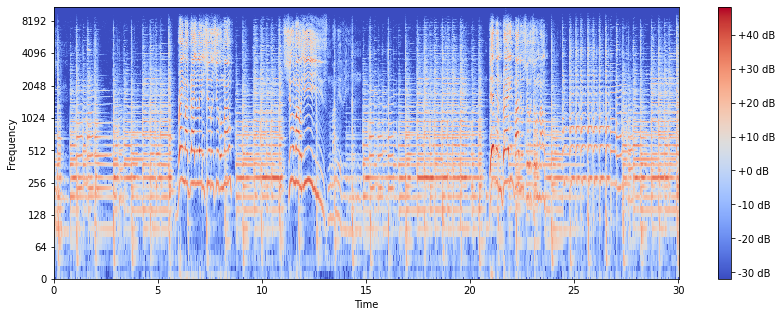

In [13]:
## 큰 수치를 간략하게 표현하기 위해서 Log-spectogram 을 구함.
## 특별히 다른 것이 아니라, amplitude을 decibel로 변환하는 것임.

log_spectrogram = librosa.amplitude_to_db(spectrogram)

fig = plt.figure(figsize = (14,5))
librosa.display.specshow(log_spectrogram, 
                         sr=sr, 
                         hop_length=hop_length,
                         x_axis='time',
                         y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()


## 대부분의 에너지가 lower frequency 쪽에 모여 있는 것을 볼 수 있다. 

## MFCC

In [14]:
MFCCs = librosa.feature.mfcc(wav, 
                             n_fft = n_fft,
                             hop_length = hop_length,
                             n_mfcc=13)   # number of coefficient we want to extract

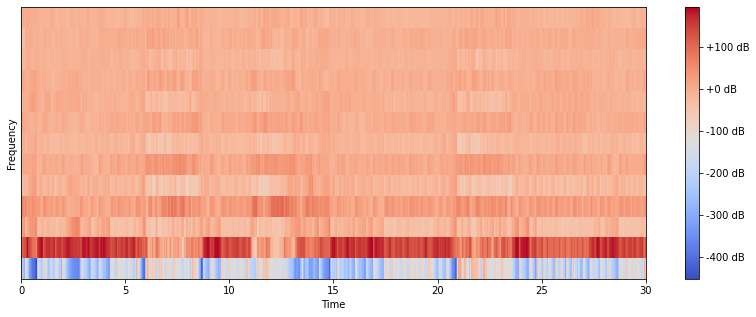

In [15]:
fig = plt.figure(figsize = (14,5))
librosa.display.specshow(MFCCs, 
                         sr=sr, 
                         hop_length=hop_length,
                         x_axis='time',)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

# refrence


- 음성/음악신호+머신러닝 초심자를 위한 가이드 [1편]
    - http://keunwoochoi.blogspot.com/2016/01/blog-post.html

- audio-processing-wave by Valerio Velarde
    - https://github.com/scpark20/audio-preprocessing-practice/blob/master/audio-processing-wave.ipynb 